# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# from jupyterthemes import jtplot
# jtplot.style()

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [13]:
for _ in range(20):
    # use train/test split wich different random_state values
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    # check classification accuracy of KNN with k=5 #соседи
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(knn.score(X_test, y_test))

0.9473684210526315
0.9736842105263158
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9210526315789473
0.9736842105263158
0.9736842105263158
1.0
1.0
0.9736842105263158
1.0
0.9473684210526315
0.9736842105263158
0.9473684210526315
0.9473684210526315
0.9473684210526315
1.0


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

In [15]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with k=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
#модель, выборки, колличиство фолдов (тут 10), скоринг по которой мерим качество
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)
print()
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]

0.9666666666666668


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

In [20]:
# search for an optimal values of k for KNN

k_range = list(range(1,31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


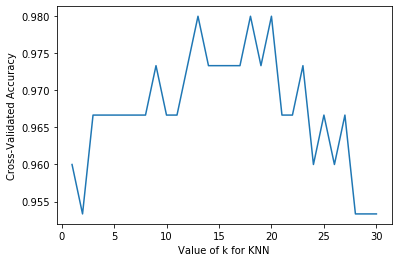

In [21]:
# plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
import numpy as np
print('max соседей: ' + str(np.argmax(k_scores)+1))

# при 0.98 качестве, 13 соседей! потому что в массиве нумерация с 0 а не с 1 (прибавляем 1)

max соседей: 13


In [ ]:
###

In [34]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores) # видно при 12 соседях ошибка в 1-ой точке

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores) # видно при 3 соседях ошибка в 2-ух точках

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]


## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [42]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [43]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [44]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=12, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [49]:
grid.cv_results_

{'mean_fit_time': array([0.00063262, 0.00100176, 0.00033453, 0.00029311, 0.00032346,
        0.00029433, 0.00029676, 0.00031638, 0.00031171, 0.00030007,
        0.00028372, 0.000332  , 0.00031765, 0.0002852 , 0.00028164,
        0.00028827, 0.00027843, 0.00028224, 0.0002907 , 0.0002876 ,
        0.00028012, 0.00029063, 0.00029106, 0.00028496, 0.00028467,
        0.00027957, 0.00029027, 0.00034983, 0.00029562, 0.00028324]),
 'std_fit_time': array([2.40496431e-04, 9.09151080e-04, 5.03131502e-05, 2.97156408e-05,
        8.60029750e-05, 2.06496505e-05, 2.98992583e-05, 7.58751161e-05,
        4.65898454e-05, 3.45679315e-05, 1.19604410e-05, 9.26576471e-05,
        4.77456704e-05, 2.53280440e-05, 1.28715344e-05, 3.06433177e-05,
        5.19052086e-06, 9.63506087e-06, 3.37427659e-05, 2.42306598e-05,
        1.04591869e-05, 1.43043200e-05, 3.68400759e-05, 1.88558199e-05,
        1.79986290e-05, 7.79537610e-06, 4.69379822e-05, 1.40458617e-04,
        3.63255489e-05, 1.12391034e-05]),
 'mean_scor

In [45]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.000632619857788086
std_fit_time : 0.00024049643114567386
mean_score_time : 0.0020074367523193358
std_score_time : 0.0009204121921139558
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 24


In [46]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

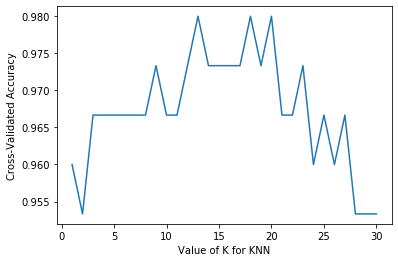

In [47]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [48]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

In [50]:
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = grid.best_estimator_.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 14]])

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

In [63]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1,31))

# Another parameter besides k that we might vary s the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily that further neighbors)

# we create a list
weight_options = ['uniform', 'distance']


# create a parameter grid: map the parameter names to the values that should be searched
# distionary = dict{key=values, key=values}
param_grid = {
    'n_neighbors': k_range,
    'weights': weight_options
}

print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [64]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 X 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=12, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [65]:
# examine the best mode
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [60]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [66]:
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [67]:
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=12,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'dist

In [68]:
print(rand.cv_results_['mean_test_score'])

[0.97333333 0.96666667 0.98       0.96666667 0.95333333 0.97333333
 0.96666667 0.97333333 0.97333333 0.97333333]


In [69]:
print(rand.cv_results_['params'])

[{'weights': 'distance', 'n_neighbors': 16}, {'weights': 'uniform', 'n_neighbors': 22}, {'weights': 'uniform', 'n_neighbors': 18}, {'weights': 'uniform', 'n_neighbors': 27}, {'weights': 'uniform', 'n_neighbors': 29}, {'weights': 'distance', 'n_neighbors': 10}, {'weights': 'distance', 'n_neighbors': 22}, {'weights': 'uniform', 'n_neighbors': 14}, {'weights': 'distance', 'n_neighbors': 12}, {'weights': 'uniform', 'n_neighbors': 15}]


In [71]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


In [72]:
print(rand.cv_results_['params'])

[{'weights': 'distance', 'n_neighbors': 16}, {'weights': 'uniform', 'n_neighbors': 22}, {'weights': 'uniform', 'n_neighbors': 18}, {'weights': 'uniform', 'n_neighbors': 27}, {'weights': 'uniform', 'n_neighbors': 29}, {'weights': 'distance', 'n_neighbors': 10}, {'weights': 'distance', 'n_neighbors': 22}, {'weights': 'uniform', 'n_neighbors': 14}, {'weights': 'distance', 'n_neighbors': 12}, {'weights': 'uniform', 'n_neighbors': 15}]


## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [32]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [33]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9642857142857143
0.9473684210526315


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [73]:
from sklearn.datasets import load_digits

In [74]:
data = load_digits()

In [75]:
X, y = data['data'], data['target']

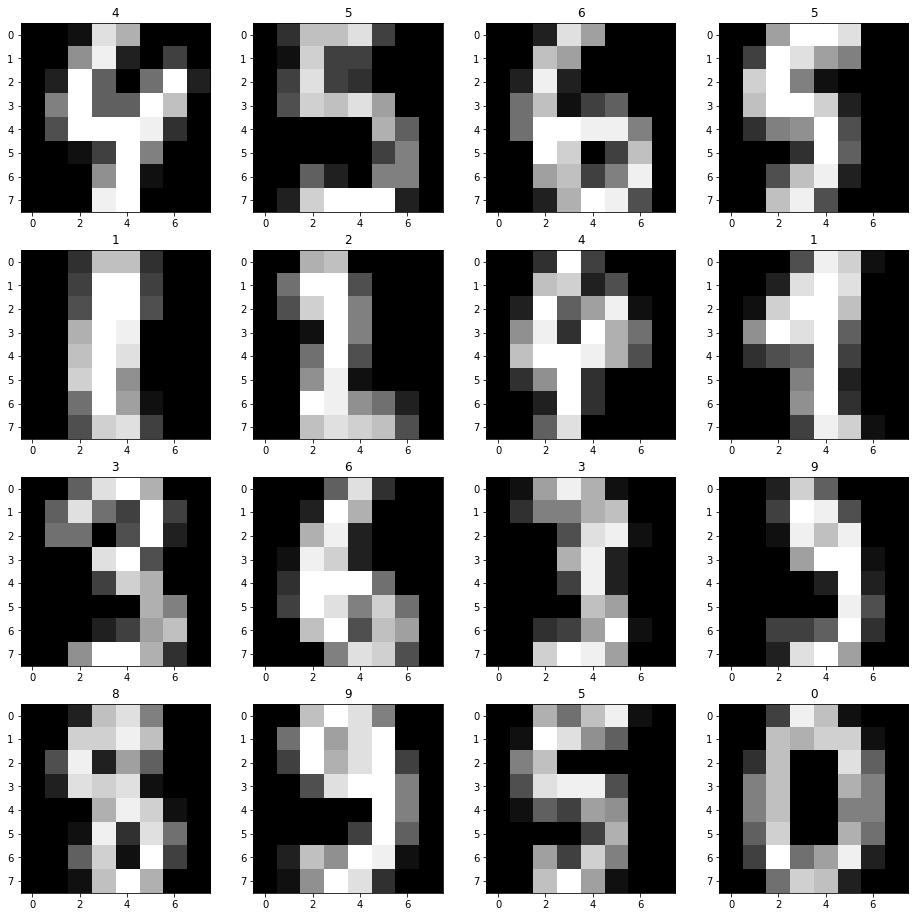

In [76]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

## Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5]
}

In [83]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
grid_lr = GridSearchCV(lr, lr_params, cv=10, scoring='accuracy')
grid_lr.fit(X_train, y_train)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [84]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'C': 0.5, 'penalty': 'l1'}
0.9659011830201809
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## SVM

In [87]:
from sklearn.svm import SVC

In [88]:
svc_params = {
    'C': [0.001, 0.01, 0.1, 0.25, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [89]:
svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, cv=10, scoring='accuracy')
grid_svc.fit(X_train, y_train)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/si

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [90]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print(grid_svc.best_estimator_)

{'C': 0.1, 'kernel': 'linear'}
0.9819067501739736
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

In [94]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [95]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 1, 'p': 1}
0.9791231732776617
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')


## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [99]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, cv=10, scoring='accuracy')
grid_tree.fit(X_train, y_train)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, None],
               

In [100]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}
0.8698677800974252
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [106]:
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, cv=10, scoring='accuracy')
grid_forest.fit(X_train, y_train)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [107]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)
print(grid_forest.best_estimator_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 40}
0.9721642310368824
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Сравниваем результаты на валидационной выборке

In [109]:
estimators = {
    'LogisticRegression': grid_lr,
    'SVM': grid_svc,
    'KNN': grid_knn,
    'DecisionTree': grid_tree,
    'RandomForest': grid_forest
}

In [111]:
for k in estimators:
    v = estimators[k]
    print(k, "CV Accuracy:", v.best_score_, "Validation Accuracy:", v.best_estimator_.score(X_valid, y_valid))

LogisticRegression CV Accuracy: 0.9659011830201809 Validation Accuracy: 0.9722222222222222
SVM CV Accuracy: 0.9819067501739736 Validation Accuracy: 0.9861111111111112
KNN CV Accuracy: 0.9791231732776617 Validation Accuracy: 0.9861111111111112
DecisionTree CV Accuracy: 0.8698677800974252 Validation Accuracy: 0.8611111111111112
RandomForest CV Accuracy: 0.9721642310368824 Validation Accuracy: 0.9833333333333333


## Выведем неверные предсказания

In [114]:
classifier = grid_forest.best_estimator_
y_pred = classifier.predict(X_valid)
wrong = y_pred != y_valid

X_wrong, y_wrong = X_valid[wrong], y_valid[wrong]

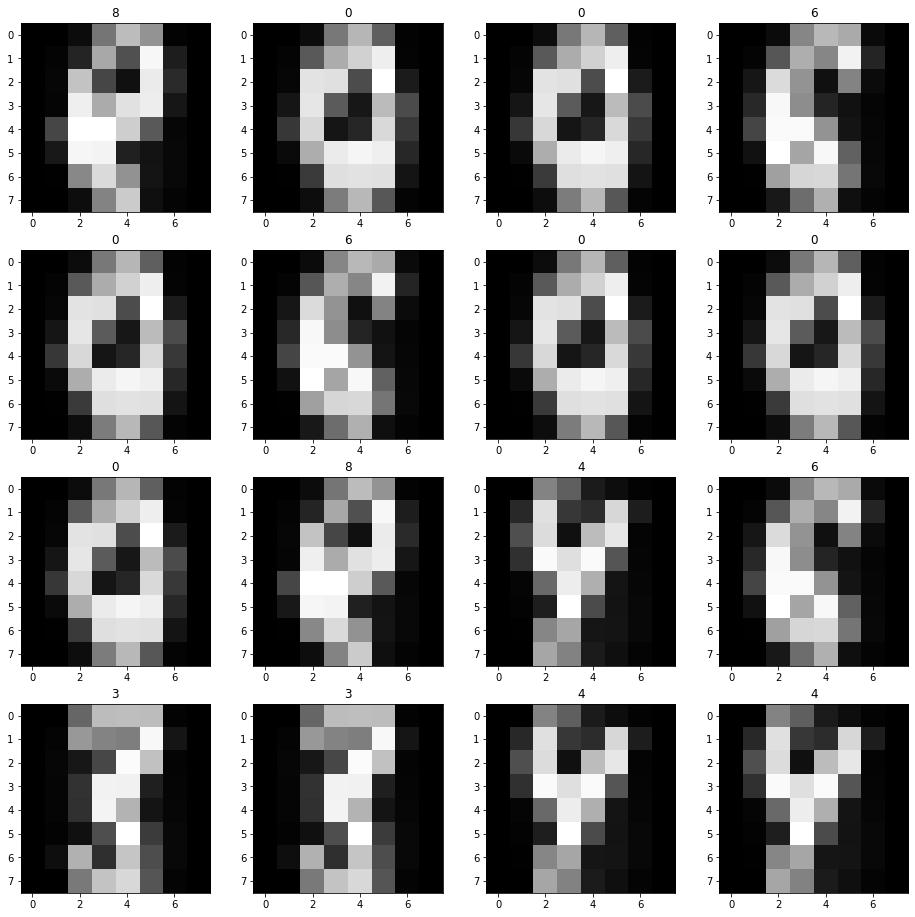

In [117]:
X_wrong = sc.inverse_transform(X_wrong)
fig = plt.figure(figsize=(16,16))

for i in range(0,4):
    for j in range(0,4):
        img = np.random.choice(len(X_wrong))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X_wrong[img].reshape(8, 8), cmap='gray')
        plt.title(y_wrong[img])
plt.show()        

# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)